# TP Recuit Simulé

Binôme : 
- LARIBI Hakima
- OULD TALEB Nada

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
import math
import random

- Ici on va d'abord implémenter l'algorithme de Metropolis Hastings pour la distribution candidate Q tel que  :
                        Q(y/x) = 1 si |x-y| < 1/2 ;
                                 0 sinon
- Il est facile de remarquer que pour Q(y/x) = 0 , nous aurons alpha = min {1, infini} = 1                               

In [15]:
##Algorithme de Metropplis Hastings
def MH(x,t,m):
    for i in range(m):
        #générer une uniforme sur [-0.5,0.5]
        v=random.uniform(0,1)-0.5
        
        #Générer la variable Y = x + v
        y=x+v
        
        #Q(y/x) = 1 si |y-x| < 0.5
        #Q(y/x) = 0 Sinon;
        if x-y<0.5 and x-y>-0.5:
            alpha=min(1,np.exp((V(x)-V(y))/t))
            u=random.uniform(0,1)
            if(u<alpha):
                x=y 
        else: #Q(y/x) = 0 ==> min(1,infini) = 1
            x=y 
    return x

Ici on implémentera le Recuit Simulé pour notre problème

In [16]:
##Implémenter le Recuit Simulé
def RS(a,b,n,m):
    min_y=-1
    #Générer X1 
    u=random.uniform(0,1)
    x=(b-a)*u+a
    #Boucle principale du Recuit Simulé
    for i in range(1,n):
        #Mise à jour de la température
        t=1/(1+np.log(i))
        #Mise à jour de la valeur de X avec MH
        x=MH(x,t,m)
        #Mise à jour du minimum
        if i==1 or V(x)<min_y:
            min_y=V(x)
            min_x=x
    return (x,V(x)),(min_x,min_y) 

Ici on visualisera la fonction V(x) qu'on cherche à minimiser

In [17]:
##Implémenter la fonction V(x)
def V(x):
    return (x**2)*(2+(np.sin(100*x))**2)

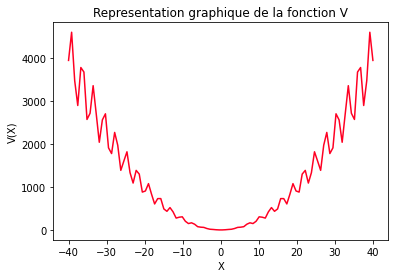

In [18]:
#Visualiser la fonction V
x = np.linspace(-40,40,100)
plt.plot(x,V(x),color='#FF0023')
plt.title('Representation graphique de la fonction V')
plt.xlabel('X')
plt.ylabel('V(X)')
plt.show()

Il est temps de tester à présent notre fonction du recuit simulé

In [20]:
(X1,Y1),(Xmin,Ymin)=RS(-10,10,1001,1001)

In [22]:
print("Résultat de la dernière itération du recuit simulé",(X1,Y1))
print("Le minimum obtenu avec le recuit simulé",(Xmin,Ymin))


Résultat de la dernière itération du recuit simulé (0.02241613985403157, 0.001313280508383121)
Le minimum obtenu avec le recuit simulé (0.00021345345794709925, 9.114551357006558e-08)
